In [23]:
#%pip install spacy
#%pip install spacy-transformers
#%pip install --upgrade huggingface-hub
#from spacy.cli import download
#download("en_core_web_trf")

#from spacy.cli import download
#download("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [135]:
import os
os.getcwd()

'/Users/qilinzhou/Desktop/Referential Communication/Result'

In [136]:
os.chdir('/Users/qilinzhou/Desktop/Referential Communication/Data')

In [147]:
# Social Master Sheet 
# Records adjectives for each social referent
# Used the spacy model with higher accuracy trf

import pandas as pd
import csv
import re
import spacy
import spacy_transformers


nlp = spacy.load('en_core_web_trf')
df = pd.read_csv ("UpdatedSocial - Sheet1.csv")
text = df['Speech'].astype(str)
text2 = df['Referent'].astype(str)
text3 = []
print(text)


for strings in text:
    countadj = 0
    strings = strings.replace("CHI:","")
    stopWords = ["&", "xxx", "=", "_", "zorg", "mm-hm", "[","]"]
    
    for badWord in stopWords:
            strings = strings.replace(badWord,"")
    # create a simple Doc object
    doc = nlp(strings)
    adj_list =[]
    # tokenize the doc
    for token in doc:
        if token.pos_ == "ADJ": #part_of_speech
            countadj = 1
            adj_list.append(token.text)
    
#if there are no adjectives for this referent, and append the empty string
    if countadj == 0:
        text3.append("")
    else:
        text3.append(adj_list)
additional = pd.DataFrame({'Adjectives_Spacy': text3})

new = pd.concat([df, additional], axis=1)

0                                                    nan
1                          CHI:        a person surfing.
2      CHI:        um surf you surf in the um on the ...
3      CHI:        and um when it's really hot in the...
4      CHI:        and you, and you hold your arms ou...
                             ...                        
951    CHI:        and like xxx you with kickboards i...
952    CHI:        because they will like get eaten b...
953                   CHI:        so like don't do that.
954    CHI:        well you see don't go swimming wit...
955                CHI:        so like just don't do it.
Name: Speech, Length: 956, dtype: object


In [148]:
new

,Participant ID,Referent,Speech,Feature,Adjectives,Adjectives_Spacy
0,56C-R11,Surfer,NaN,NaN,NaN,
1,56C-R13,1,CHI: a person surfing.,L+P,NaN,
2,56C-R15,2,CHI: um surf you surf in the um on the ...,F+L,NaN,
3,56C-R16,3,CHI: and um when it's really hot in the...,F,NaN,[hot]
4,56C-R17,4,"CHI: and you, and you hold your arms ou...",P,NaN,
...,...,...,...,...,...,...
951,39C-R255,3,CHI: and like xxx you with kickboards i...,I+P,NaN,
952,39C-R257,4,CHI: because they will like get eaten b...,I,NaN,
953,39C-R258,5,CHI: so like don't do that.,I,NaN,
954,39C-R260,6,CHI: well you see don't go swimming wit...,I,NaN,


In [1]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.pos_, token.dep_)

/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup NOUN dep
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


In [6]:
# Save Social Adjectives in a new csv 
os.chdir('/Users/qilinzhou/Desktop/Referential Communication/Result')
new.to_csv('social_adj.csv')

{'surfer': ["['wet']", "['old']"], 'king': ["['nice', 'neat']", "['strong']", "['magical']", "['royal']", "['royal']", "['alive', 'right']", "['alive']", "['alive', 'dark', 'blond']", "['blue']", "['green']", "['green', 'yellow', 'black']"], 'police officer': ["['important']", "['black']"], 'weightlifter': ["['strong']", "['strong']", "['giant']", "['big']", "['strong']", "['tough']", "['naked', 'naked']", "['strong']", "['strong', 'strong']", "['scary']", "['strong']", "['fastest']", "['faster']"], 'farmer': [], 'clown': ["['funny']", "['cool']", "['funny']", "['big']", "['silly']", "['funny']", "['funny']"], 'witch': ["['spooky']", "['green']", "['scary']", "['scary']", "['scary']"], 'pilot': ["['good']"], 'football player': [], 'teacher': ["['old']", "['old']"], 'doctor': ["['good']", "['good', 'evil']"], 'painter': [], 'baby': ["['tiny']", "['funny']"], 'baseball player': ["['nice']"], 'pirate': ["['mean']"], 'old woman': ["['old']", "['old']", "['old', 'old']", "['old']", "['old']

/var/folders/97/r7d175650dg4fx0f_n5km01w0000gn/T/ipykernel_33252/630154336.py:28: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df2.apply(pd.value_counts).plot(kind="barh", subplots=True, layout=(9,4), legend=False, figsize=(10,80))
/var/folders/97/r7d175650dg4fx0f_n5km01w0000gn/T/ipykernel_33252/630154336.py:28: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df2.apply(pd.value_counts).plot(kind="barh", subplots=True, layout=(9,4), legend=False, figsize=(10,80))
/var/folders/97/r7d175650dg4fx0f_n5km01w0000gn/T/ipykernel_33252/630154336.py:28: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df2.apply(pd.value_counts).plot(kind="barh", subplots=True, layout=(9,4), legend=False, figsize=(10,80))
/var/folders/97/r7d175650dg4fx0f_n

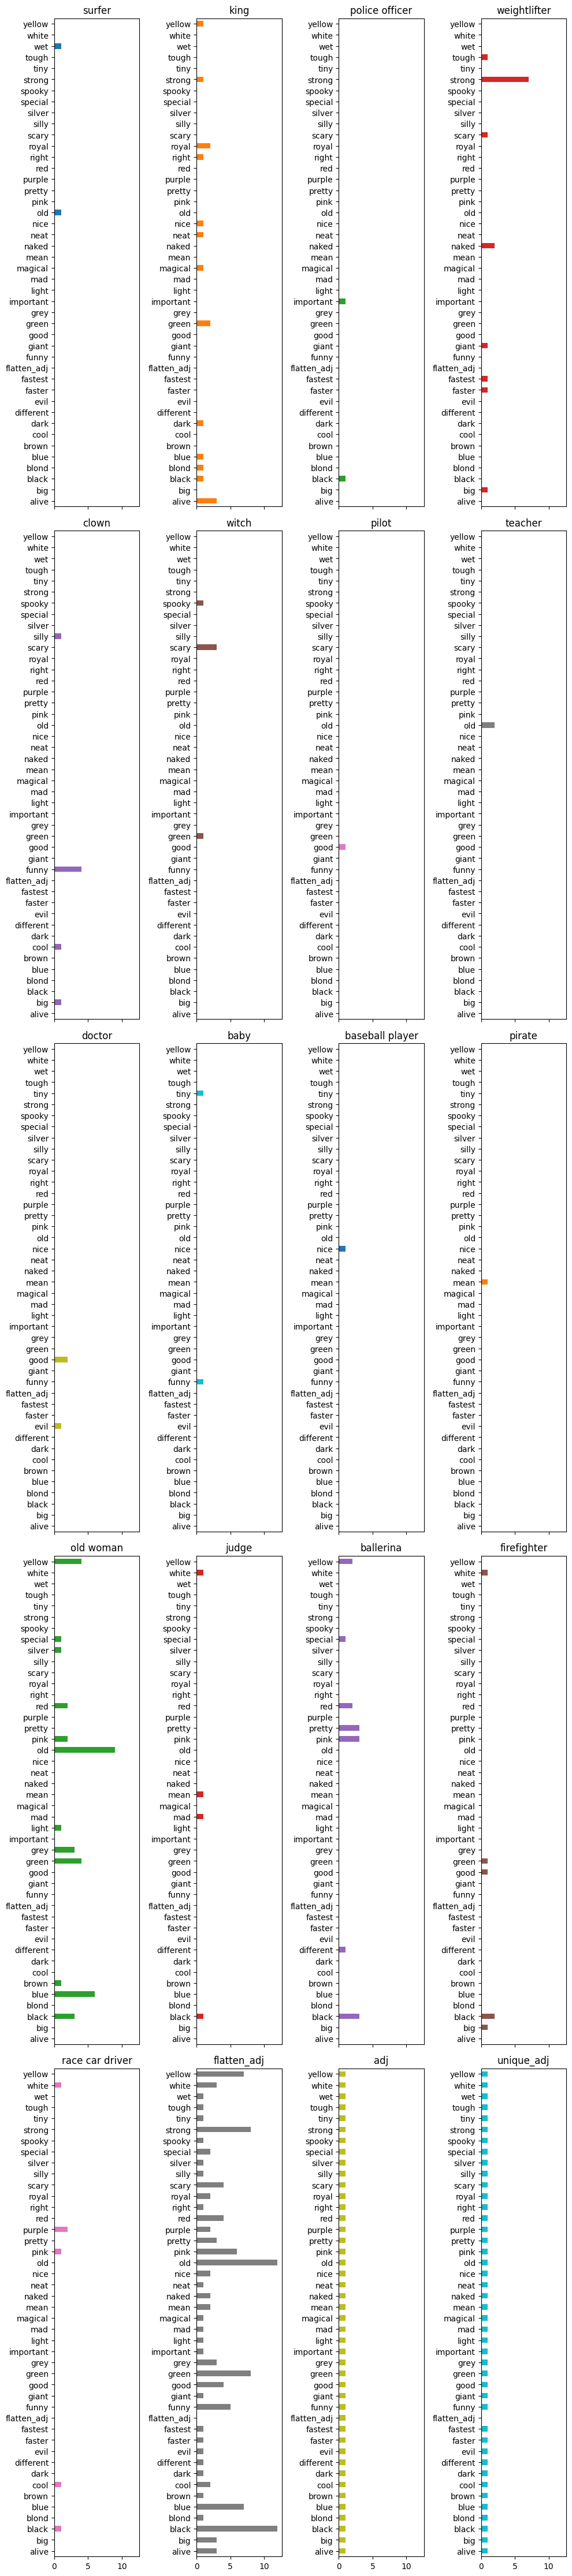

In [7]:
# Created the distribution plot for each social referent after further cleaning and manual check in Excel 
os.chdir('/Users/qilinzhou/Desktop/Referential Communication/Data')
df = pd.read_csv ("Spacytest_social_trfpipeline - test.csv")
adjectives = df['Adjectives_Spacy'].astype(str)
df2 = pd.read_csv ("Spacytest_social_trfpipeline - plot design.csv")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df2.apply(pd.value_counts).plot(kind="barh", subplots=True, layout=(9,4), legend=False, figsize=(10,80))

plt.tight_layout()  
plt.show()

In [145]:
# We have also tried other packages such as en_core_web_sm and NLTK
# nlp = spacy.load("en_core_web_sm")
# TRF and SM both have high reading performance in our transcripts
# For social and animal referents, we have tried sm 

os.chdir('/Users/qilinzhou/Desktop/Referential Communication/Data')
df = pd.read_csv ("Master Children Description Data - Master food description.csv")
nlp = spacy.load("en_core_web_sm")
text = df['Speech'].astype(str)
text2 = df['referent'].astype(str)
text3 = []


for strings in text:
    countadj = 0
    strings = strings.replace("CHI:","")
    stopWords = ["&", "xxx", "=", "_", "zorg", "mm-hm", "[","]"]
    
    for badWord in stopWords:
            strings = strings.replace(badWord,"")
    # create a simple Doc object
    doc = nlp(strings)
    adj_list =[]
    # tokenize the doc
    for token in doc:
        if token.pos_ == "ADJ":
            countadj = 1
            adj_list.append(token.text) 
# if there are no adjectives for this referent, and append the empty string
    if countadj == 0:
        text3.append("")
    else:
        text3.append(adj_list)

additional = pd.DataFrame({'Adjectives_Spacy_sm': text3})

new = pd.concat([df, additional], axis=1)


In [110]:
# n-grams for spacy objects (noun_adj pairs)
def n_grams(doc, n, pair_list):
    tokens = [token for token in doc if not token.is_stop]
    for i in range(len(tokens) - n + 1):
        n_gram = tokens[i:i + n]
        # Loop through each token in the n-gram
        for token in n_gram:
            # Check if the token is an adjective
            if token.pos_ == "ADJ":
                # Check if the head of the adjective is a noun and is in the same n-gram
                if token.head.pos_ == "NOUN" and token.head in n_gram:
                    pair = (token.head, token)  # (Noun, Adjective)
                    pair_list.append(pair)

    return pair_list
pair_list = []
for strings in text:
    countadj = 0
    strings = strings.replace("CHI:","")
    stopWords = ["&", "xxx", "=", "_", "zorg", "mm-hm", "[","]"]
    
    for badWord in stopWords:
            strings = strings.replace(badWord,"")
    
    doc = nlp(strings)
    n_grams(doc, 5, pair_list)

pair_list


[(cracker, orange),
 (gold, light),
 (holes, little),
 (bit, little),
 (bit, little),
 (bit, little),
 (gold, dark),
 (gold, dark),
 (gold, dark),
 (gold, dark),
 (thing, orange),
 (thing, becausea),
 (thing, orange),
 (thing, becausea),
 (pie, pumpkin),
 (pie, pumpkin),
 (pie, pumpkin),
 (pie, pumpkin),
 (pumpkin, mean),
 (pumpkin, mean),
 (pumpkin, nice),
 (pumpkin, mean),
 (pumpkin, nice),
 (ones, big),
 (ones, big),
 (ones, big),
 (pan, smallest),
 (pan, smallest),
 (stuff, green),
 (bit, little),
 (bit, little),
 (bit, little),
 (bits, pokey),
 (bits, pokey),
 (bits, pokey),
 (ones, big),
 (ones, little),
 (ones, little),
 (dots, little),
 (dots, orange),
 (stripes, black),
 (stripes, little),
 (stripes, black),
 (stripes, little),
 (cup, sippy),
 (cup, big),
 (cup, big),
 (flavors, different),
 (pies, neat),
 (pies, neat),
 (pie, jelly),
 (pie, pumpkin),
 (pie, pumpkin),
 (pie, pumpkin),
 (pie, pumpkin),
 (pie, pumpkin),
 (fruit, good),
 (fruit, good),
 (things, red),
 (things, r

<Axes: >

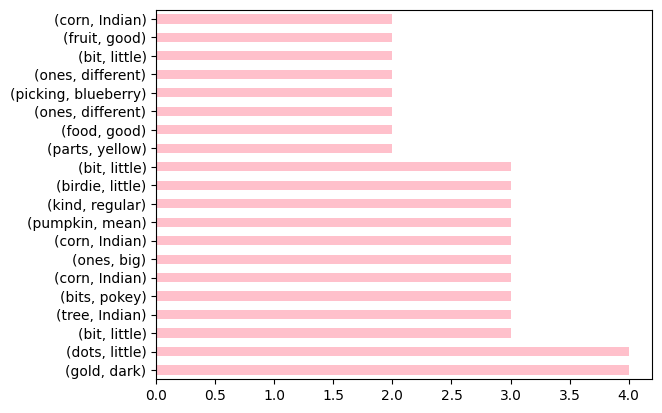

In [133]:
bigrams = pd.Series(pair_list).value_counts()[:20]
bigrams.plot(kind='barh', color = "pink")

In [146]:
new

,Order,ID,Speech,Feature,referent,Adjectives(NLTK predictions_seperated by blank line),Adjectives(Spacy predictions),Adjectives_Spacy_sm
0,1.0,7.0,CHI: a cracker.,L,cracker,cracker,cracker,
1,1.0,7.0,CHI: a cracker that's that's blue and a...,L+P,cracker,blue,blue,"[blue, orange, white]"
2,1.0,7.0,CHI: it's a colors.,P,cracker,white,orange,
3,1.0,7.0,CHI: it can eat.,F,cracker,orange,white,
4,1.0,7.0,CHI: it eats.,NaN,cracker,white,orange,
...,...,...,...,...,...,...,...,...
859,27.0,31.0,"CHI: it's, healthy.",P,broccoli,NaN,NaN,[healthy]
860,27.0,31.0,CHI: it is yummy.,I+P,broccoli,NaN,NaN,[yummy]
861,27.0,31.0,"CHI: and I know one more, which I don't...",I,broccoli,NaN,NaN,[more]
862,27.0,31.0,CHI: it has Vitamin_C.,P,broccoli,NaN,NaN,


In [71]:
text = new['Adjectives_Spacy_sm']
referent_adj = {}
for i, list_strings in enumerate(text):
    referent = new['referent'][i]
    if list_strings:
        if referent not in referent_adj:
            referent_adj[referent] = []
            for adj in list_strings:
                referent_adj[referent].append(adj)
        else:
            for adj in list_strings:
                referent_adj[referent].append(adj)

referent_adj

{'cracker': ['blue',
  'orange',
  'white',
  'orange',
  'white',
  'light',
  'crunchy',
  'little',
  'sugary',
  'square',
  'crunchy',
  'little',
  'crunchy',
  'big'],
 'ice cream': ['black',
  'little',
  'orange',
  'orange',
  'pink',
  'pink',
  'dark',
  'good',
  'sweet',
  'healthy',
  'sweet',
  'cold',
  'favorite',
  'blue',
  'other',
  'cold',
  'much',
  'becausesome',
  'yucky',
  'whole',
  'yummy',
  'whole',
  'flat'],
 'pumpkin': ['orange',
  'becausea',
  'orange',
  'blue',
  'pumpkin',
  'orange',
  'sweet',
  'pumpkin',
  'pumpkin',
  'orange',
  'big',
  'scary',
  'orange',
  'mean',
  'nice',
  'plain',
  'big',
  'silly'],
 'muffin': ['bottom',
  'orange',
  'orange',
  'smallest',
  'big',
  'biggest',
  'little',
  'allergic',
  'allergic',
  'pet',
  'plain',
  'areplain',
  'nuts',
  'nuts'],
 'pineapple': ['orange',
  'black',
  'green',
  'orange',
  'orange',
  'green',
  'green',
  'little',
  'pokey',
  'pokey',
  'brown',
  'big',
  'little',


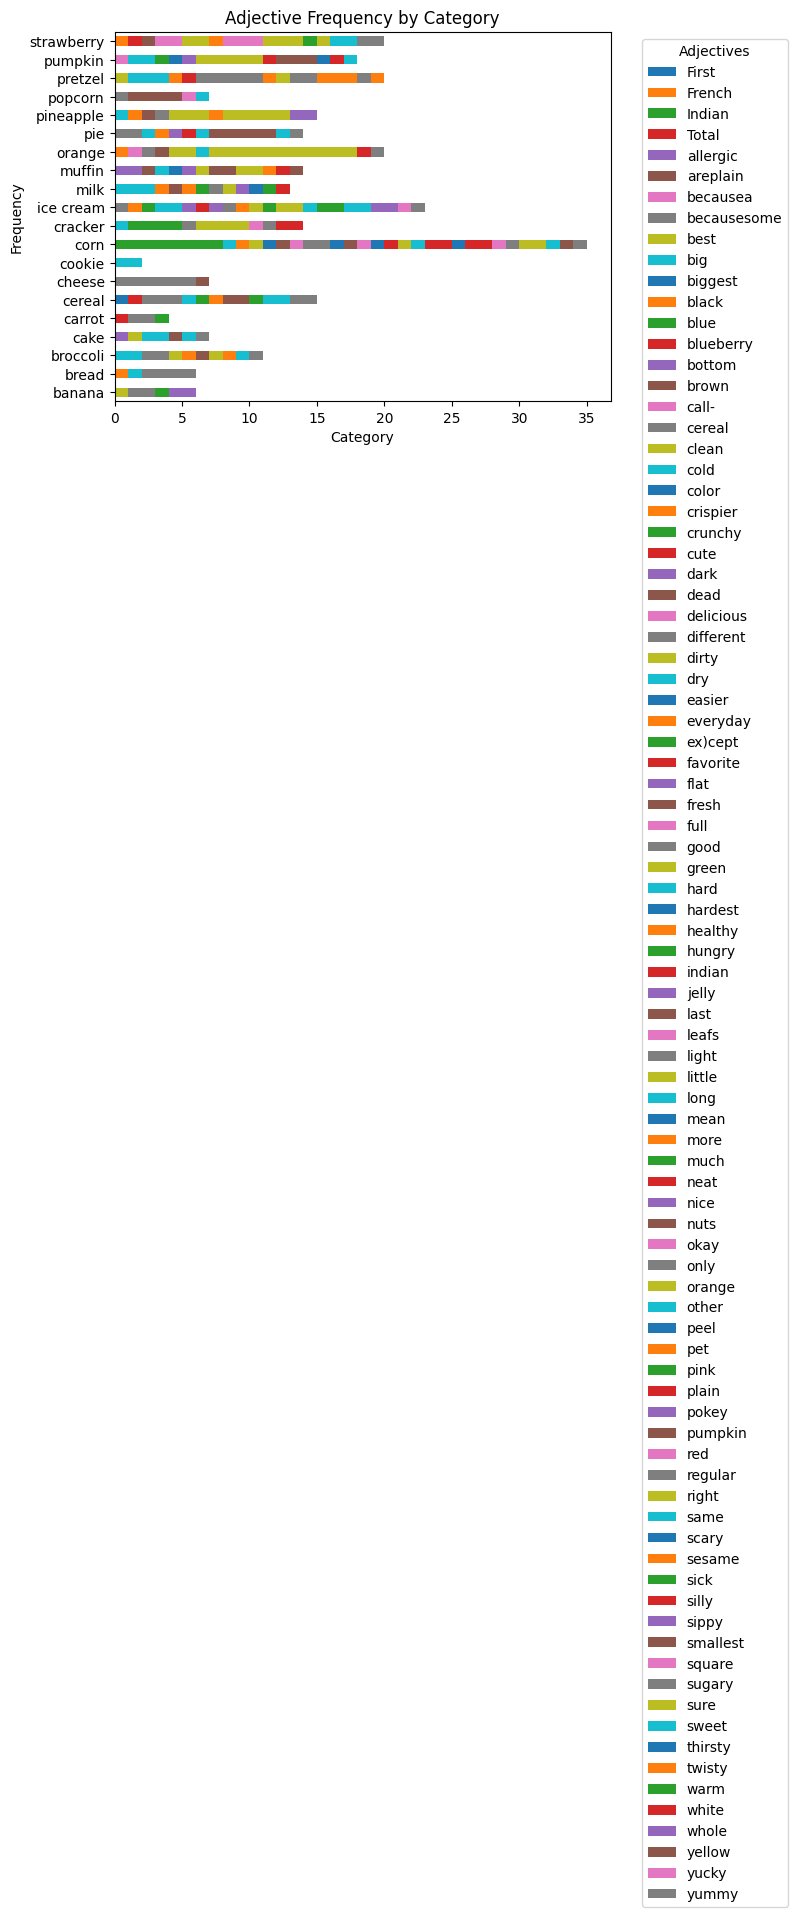

In [101]:
# Count frequency of each adjective within each category
referent_adj_list = [(key, value) for (key, adj) in referent_adj.items() for value in adj]
df = pd.DataFrame(referent_adj_list, columns = ['Category', 'Adjective'])
adjective_counts = df.groupby(['Category', 'Adjective']).size().unstack(fill_value=0)
# Plot
adjective_counts.plot(kind='barh', stacked=True)

plt.title('Adjective Frequency by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.legend(title='Adjectives', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [62]:
# Save Food Adjectives in a new csv 
os.chdir('/Users/qilinzhou/Desktop/Referential Communication/Result')
new.to_csv('food_adj.csv')

In [59]:
# Sample NLTK codes
# nltk.download('stopwords')
os.chdir('/Users/qilinzhou/Desktop/Referential Communication/Data')
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df = pd.read_csv ("Master Children Description Data - Master food description.csv")
text = df['Speech'].astype(str)
punctuation = re.compile (r"[-.?!,:;()'|0-9]")
stopWords = ["&", "xxx", "=", "_", "zorg", "mm-hm"]
text2 = []
noun_adj_pairs = []
adj = []

for strings in text:
    strings = strings.replace("CHI:","")
    tokenized = wordpunct_tokenize(strings)
    wordsList = []
    for word in tokenized:
        word = punctuation.sub("",word)
        if word not in stopWords:
            if len(word) > 0:
                wordsList.append(word)
    # Use a Tagger. Which is part-of-speech
    # tagger or POS-tagger.
    tagged = nltk.pos_tag(wordsList)
    for i in tagged:
        if i[1] == 'JJ' and i[0] not in stop_words:
            adj.append (i[0])
    if strings == "nan":
        adj.append("")

additional = pd.DataFrame({'Adjectives_NLTK': adj})
new = pd.concat([df, additional], axis=1)
new


,Order,ID,Speech,Feature,referent,Adjectives(NLTK predictions_seperated by blank line),Adjectives(Spacy predictions),Adjectives_NLTK
0,1.0,7.0,CHI: a cracker.,L,cracker,cracker,cracker,white
1,1.0,7.0,CHI: a cracker that's that's blue and a...,L+P,cracker,blue,blue,orange
2,1.0,7.0,CHI: it's a colors.,P,cracker,white,orange,white
3,1.0,7.0,CHI: it can eat.,F,cracker,orange,white,thirteen
4,1.0,7.0,CHI: it eats.,NaN,cracker,white,orange,light
...,...,...,...,...,...,...,...,...
859,27.0,31.0,"CHI: it's, healthy.",P,broccoli,NaN,NaN,NaN
860,27.0,31.0,CHI: it is yummy.,I+P,broccoli,NaN,NaN,NaN
861,27.0,31.0,"CHI: and I know one more, which I don't...",I,broccoli,NaN,NaN,NaN
862,27.0,31.0,CHI: it has Vitamin_C.,P,broccoli,NaN,NaN,NaN


<Axes: ylabel='Adjectives_NLTK'>

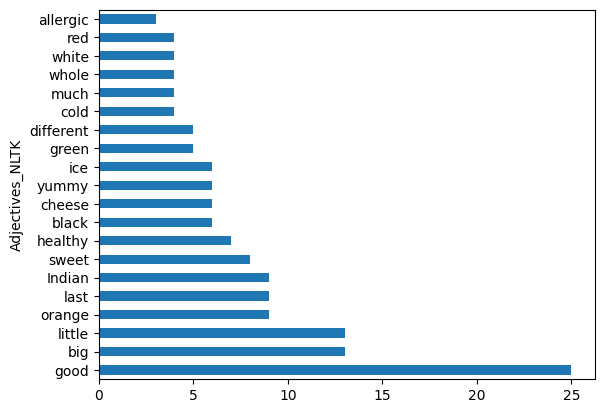

In [60]:
import numpy as np
import matplotlib.pyplot as plt 
cleaned_adj = new[new['Adjectives_NLTK'].str.len() > 0]
# creating the bar plot
cleaned_adj['Adjectives_NLTK'].value_counts()[:20].plot(kind='barh')

In [63]:
# Food adjective visualization
# Network Attempt Update 
# reference to this link: https://pyvis.readthedocs.io/en/latest/tutorial.html
# %pip install pyvis
os.chdir('/Users/qilinzhou/Desktop/Referential Communication/Data')
import pandas as pd
import pyvis 
from pyvis.network import Network 
import networkx as nx

pairs = pd.read_csv ("Adjective_referent_With_Weight_Food.csv")
#count the duplicate pairs of {adjective, referent} and assign this duplicate count as weight
pairs = pairs.groupby(by=['Adjective','Referent']).size().reset_index(name='duplicate')

os.chdir('/Users/qilinzhou/Desktop/Referential Communication/Result')
pairs.to_csv("WeightforNetwork_Food.csv")

# Prepare data for network
sources = pairs["Adjective"]
targets = pairs["Referent"]
weights = pairs["duplicate"]
edge_data = zip(sources, targets, weights)

# Initialize Pyvis Network
got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# Set the adjective node, referent node, and edge length
for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src, color="pink")
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

# Generate neighbor map
neighbor_map = got_net.get_adj_list()

# Add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += " Neighbors:" + " ".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

got_net.save_graph("food_adj_referent.html")



In [67]:
# Reliability Check of TRF (Cross-validation on other linguistic databases with noun and pronouns manually counted)
# Count noun and adjective
os.chdir('/Users/qilinzhou/Desktop/Referential Communication/Data')
import re
df = pd.read_csv ("Coding Sheet_037 Annette_after exclusion - Coding Sheet.csv")
text = df['transcribe.content'].astype(str)

nlp = spacy.load('en_core_web_sm')
noun = []
pronoun = []
noun_pre = df['Noun (1/0)']
pronoun_pre = df['Pronoun (1/0)']
m = 0 #initiate counts for accurate nouns
n =0 #initiate counts for accurate pronouns
for i, strings in enumerate(text):
    count1=0
    count2=0
    stopWords = ["&", "xxx", "=", "_", "zorg", "mm-hm", "[","]", "um"]
    for badWord in stopWords:
        strings = strings.replace(badWord,"")
    # create a simple Doc object
    doc = nlp(strings)
    # tokenize the doc
    for token in doc:
        if token.pos_ == "NOUN":
            count1+=1
        if token.pos_ == "PRON":
            count2+=1
    noun.append(count1)
    pronoun.append(count2)

# Expected output
additional = pd.DataFrame({'Nouns_Spacy':noun,'Pronoun_Spacy':pronoun})
new = pd.concat([df, additional], axis=1)
os.chdir('/Users/qilinzhou/Desktop/Referential Communication/Result')
new.to_csv("037_count_check_Spacy.csv")

# Accuracy Check
for i in range(len(noun)):
    if noun[i]==noun_pre[i]:
        m+=1
    if pronoun_pre[i]==pronoun[i]:
        n+=1

Accuracy_noun_spacy = m/len(noun)    
Accuracy_pronoun_spacy = n/len(pronoun)
print(Accuracy_noun_spacy)
print(Accuracy_pronoun_spacy)



0.8159250585480093
0.9021077283372365


In [134]:
# NLTK reliability check
os.chdir('/Users/qilinzhou/Desktop/Referential Communication/Data')
df = pd.read_csv ("Emma (Primary) Coding Sheet_031_after exclusion - Sheet1.csv")
stop_words = set(stopwords.words('english'))
stopWords = ["&", "xxx", "=", "_", "zorg", "mm-hm", "[","]", "um"]
text = df['Transcript'].astype(str)
text2 = []
noun_adj_pairs = []
noun = []
pronoun = []
m=0
n=0
noun_pre = df['Noun (1/0)']
pronoun_pre = df['Pronoun (1/0)']
for strings in text:
    for badWord in stopWords:
        strings = strings.replace(badWord,"")
    tokenized = wordpunct_tokenize(strings)
    tagged = nltk.pos_tag(tokenized)
    count1 = 0
    count2 = 0
    for i in tagged:
        if (i[1] == 'NN' or i[1]=='NNP' or i[1] ==  "NNPS" or i[1] == "NNS") and i[0] not in stop_words:         
            count1+=1
                
        if i[1] == 'PRP' or i[1]== 'PRP$':
            count2+=1
    noun.append(count1)
    pronoun.append(count2)
        
os.chdir('/Users/qilinzhou/Desktop/Referential Communication/Result')
additional = pd.DataFrame({'Nouns_NLTK':noun,'Pronoun_NLTK':pronoun})
additional.to_csv("(Emma)NLTK.csv")

#Accuracy Check
for i in range(len(noun)):
    if noun[i]==noun_pre[i]:
        m+=1
    if pronoun[i]==pronoun_pre[i]:
        n+=1

accuracy_noun_NLTK = m/len(noun)
accuracy_pronoun_NLTK = n/len(pronoun)
print(accuracy_noun_NLTK)
print(accuracy_pronoun_NLTK)

0.5148975791433892
0.8798882681564246


In [ ]:
In conclusion, Spacy generally outperformed NLTK in word tagging, or part of speech 